<a href="https://colab.research.google.com/github/devesh8423/Complete_DeepLearning/blob/main/ANN_Binary_class_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# df["Exited"]

In [5]:

df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


#**ONEHOT ENCODING**


In [10]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [16]:
x=df.drop(columns=["Exited"])
y=df["Exited"]

# **Here we need scalling**


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# **Here we start using tensorflow library**

In [23]:
import tensorflow
from tensorflow import  keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [24]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))
# 36: weights
# 4: Bias

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2) # Here validation_split means that
# it split the training data in train test

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.4142 - val_accuracy: 0.8369 - val_loss: 0.4002
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.4137 - val_accuracy: 0.8369 - val_loss: 0.4001
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8375 - loss: 0.4037 - val_accuracy: 0.8356 - val_loss: 0.4001
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8374 - loss: 0.4009 - val_accuracy: 0.8363 - val_loss: 0.4000
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4069 - val_accuracy: 0.8363 - val_loss: 0.4000
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.4110 - val_accuracy: 0.8363 - val_loss: 0.4000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.4261 - val_accuracy: 0.8363 - val_loss: 0.3999
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.4054 - val_accu

In [34]:
import matplotlib.pyplot as plt


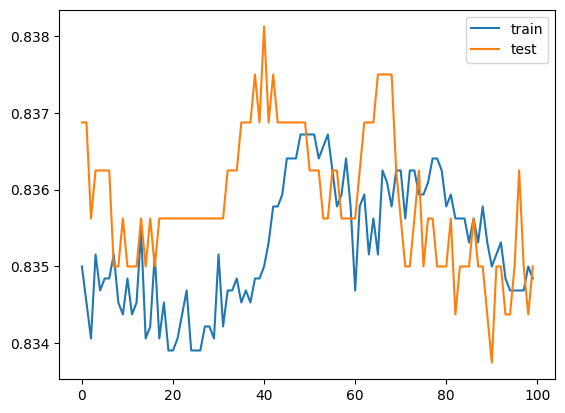

In [38]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend();

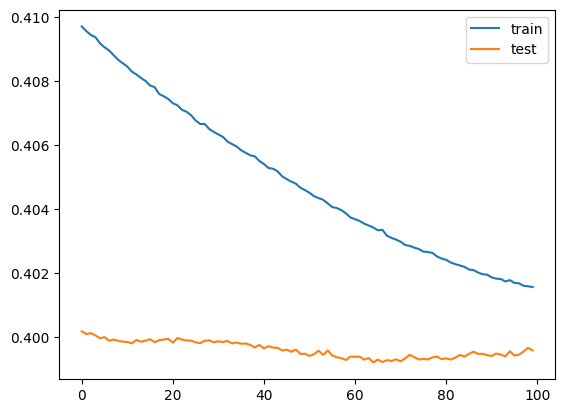

In [40]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend();

In [46]:
len(model.layers[0].get_weights()[0])

11

In [51]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [49]:
from sklearn.metrics import accuracy_score


In [52]:
accuracy_score(y_train,y_pred_train)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# **ValueError: Classification metrics can't handle a mix of binary and continuous targets**

In [59]:
y_pred_train=np.where(y_pred_train>0.5,1,0)

In [60]:
accuracy_score(y_train,y_pred_train)

0.835

In [63]:
accuracy_score(y_test,y_pred_test)

0.84

In [62]:
y_pred_test=np.where(y_pred_test>0.5,1,0)

In [65]:
# Never use sigmoid function in hidden layer beacuase at one moment it stop training

In [ ]:
# Here we use Relu

In [86]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=11))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [89]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7878 - loss: 0.5779 - val_accuracy: 0.7987 - val_loss: 0.4630
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4608 - val_accuracy: 0.7987 - val_loss: 0.4452
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4427 - val_accuracy: 0.7987 - val_loss: 0.4372
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.4378 - val_accuracy: 0.8050 - val_loss: 0.4299
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7922 - loss: 0.4409 - val_accuracy: 0.8231 - val_loss: 0.4227
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8141 - loss: 0.4354 - val_accuracy: 0.8269 - val_loss: 0.4157
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.4236 - val_accuracy: 0.8288 - val_loss: 0.4084
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4065 - val_accuracy: 0.

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [92]:
y_pred_train=np.where(y_pred_train>0.5,1,0)

In [93]:
accuracy_score(y_train,y_pred_train)

0.861625

In [94]:
y_pred_test=np.where(y_pred_test>0.5,1,0)

In [95]:
accuracy_score(y_test,y_pred_test)

0.862

In [96]:
import matplotlib.pyplot as plt


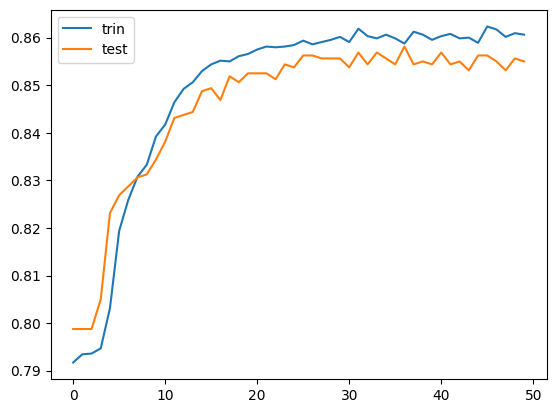

In [97]:
plt.plot(history.history["accuracy"],label="trin")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend();

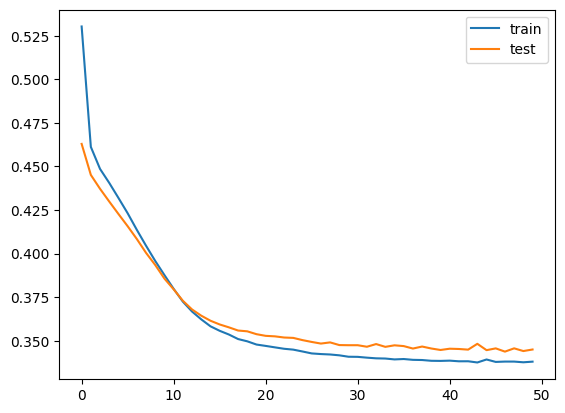

In [98]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend();